# IMPORTS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# DATA LOAD

In [4]:
idata = pd.read_csv("./income_evaluation.csv")
idata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#  EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
idata.shape

(32561, 15)

In [6]:
print("No of rows:",idata.shape[0])
print("No of columns:",idata.shape[1])

No of rows: 32561
No of columns: 15


In [7]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

idata.columns = col_names

idata.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [8]:
idata.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [9]:
idata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
idata.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
idata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [12]:
idata.describe(include='object')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [13]:
idata.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


Checking missing values

In [14]:
idata.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [15]:
idata.isnull().sum().sum() 

0

There is no missing variables in the dataset.<br>
15 attributes and 32561 records are present in the data set.

In [16]:
idata.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

**Exploring categorical column**

In [17]:
categorical = []
numerical = []

for i in idata.columns:
    if idata[i].dtype=='O':
        categorical.append(i)
    else:
        numerical.append(i)

In [18]:
print(categorical)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [19]:
print(numerical)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [20]:
idata[categorical].nunique()

workclass          9
education         16
marital_status     7
occupation        15
relationship       6
race               5
sex                2
native_country    42
income             2
dtype: int64

In [21]:
idata[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [22]:
for categorical_var in idata[categorical]:
    print("Column name",categorical_var,20*'-')
    print(idata[categorical_var].value_counts())

Column name workclass --------------------
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Column name education --------------------
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
Column name marital_status --------------------
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married

our target variable is "income"

In [23]:
idata["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [24]:
idata['income'].value_counts()/len(idata)


income
<=50K    0.75919
>50K     0.24081
Name: count, dtype: float64

<Axes: ylabel='count'>

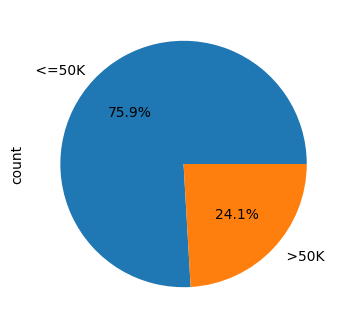

In [25]:
pie = plt.subplots(figsize=(12,4))
idata['income'].value_counts().plot.pie(autopct='%1.1f%%')


There is higher percentage of '<=50K' than '>50K'

Now, visualising income with respect to other categorical variables

WORKCLASS

In [26]:
idata['workclass'].value_counts()


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [27]:
idata['workclass'].replace(' ?',np.NaN,inplace=True)

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_11100\464360475.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  idata['workclass'].replace(' ?',np.NaN,inplace=True)


In [28]:
idata['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

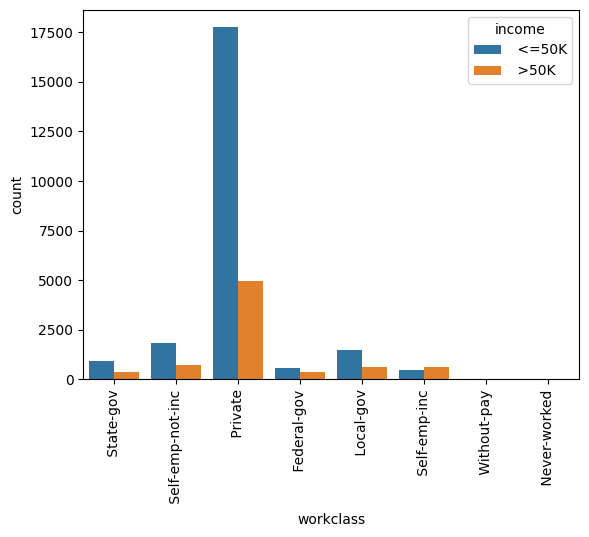

In [29]:
sns.countplot(x='workclass',hue='income',data=idata)
plt.xticks(rotation=90)


Private workclass has higher income than other types.

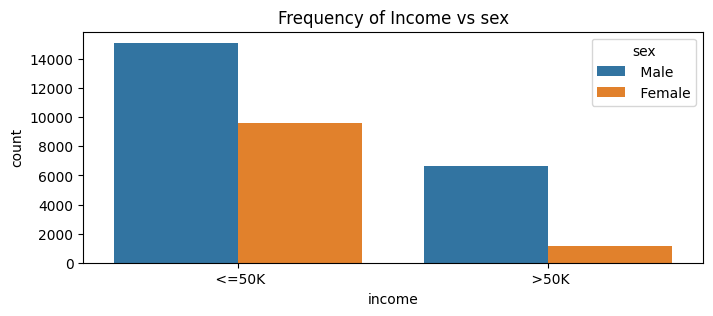

In [30]:
f,ax=plt.subplots(figsize=(8,3))
ax=sns.countplot(x='income',hue='sex',data=idata)
ax.set_title("Frequency of Income vs sex")
plt.show()


RACE

In [31]:
idata['race'].value_counts()


race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

<Axes: xlabel='race'>

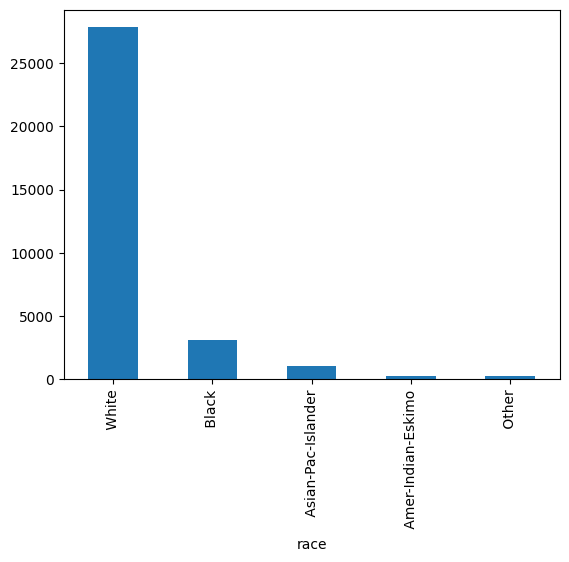

In [32]:
idata['race'].value_counts().plot.bar()

White people are taking more income than any other race.

OCCUPATION

In [33]:
idata['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [34]:
idata['occupation'].replace(' ?',np.NaN,inplace=True)

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_11100\4001010636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  idata['occupation'].replace(' ?',np.NaN,inplace=True)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ' Adm-clerical'),
  Text(1, 0, ' Exec-managerial'),
  Text(2, 0, ' Handlers-cleaners'),
  Text(3, 0, ' Prof-specialty'),
  Text(4, 0, ' Other-service'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

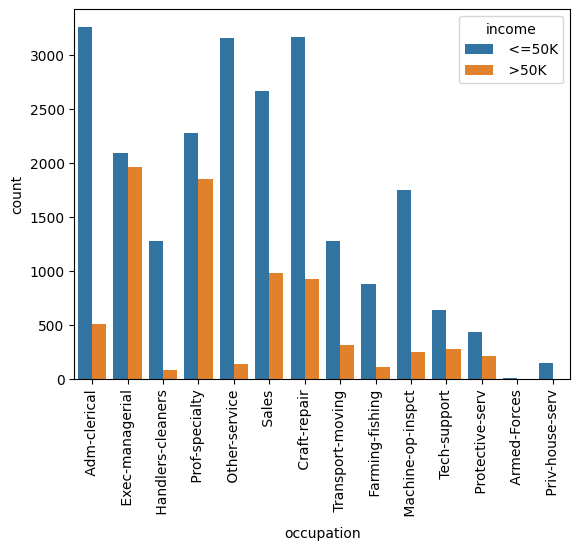

In [35]:
sns.countplot(x='occupation',hue='income',data=idata)
plt.xticks(rotation=90)


NATIVE COUNTRY

In [36]:
idata['native_country'].value_counts()


native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [37]:
idata['native_country'].replace(' ?',np.NaN,inplace=True)

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_11100\2537952454.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  idata['native_country'].replace(' ?',np.NaN,inplace=True)


In [38]:
idata['native_country'].value_counts()


native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40],
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Tex

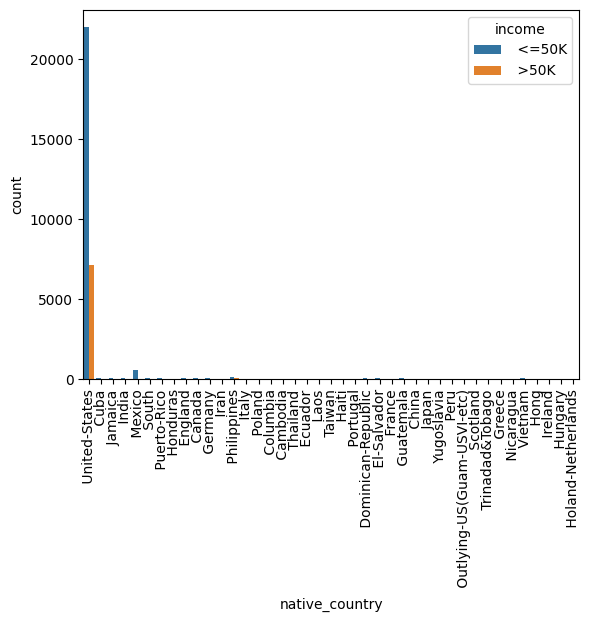

In [39]:
sns.countplot(x='native_country',hue='income',data=idata)
plt.xticks(rotation=90)


In terms of native-country, United-States is clearly dominating than any other country.

In [40]:
idata[categorical].isnull().sum().sort_values(ascending=False)


occupation        1843
workclass         1836
native_country     583
education            0
marital_status       0
relationship         0
race                 0
sex                  0
income               0
dtype: int64

In [41]:
for col in categorical:
    print(col,' contains ',len(idata[col].unique()),' labels.')


workclass  contains  9  labels.
education  contains  16  labels.
marital_status  contains  7  labels.
occupation  contains  15  labels.
relationship  contains  6  labels.
race  contains  5  labels.
sex  contains  2  labels.
native_country  contains  42  labels.
income  contains  2  labels.


**Numerical variables**

In [42]:
print(numerical)

['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [43]:
idata[numerical].nunique()

age                  73
fnlwgt            21648
education_num        16
capital_gain        119
capital_loss         92
hours_per_week       94
dtype: int64

In [44]:
idata[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [45]:
idata[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [46]:
idata[numerical].corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Heatmap

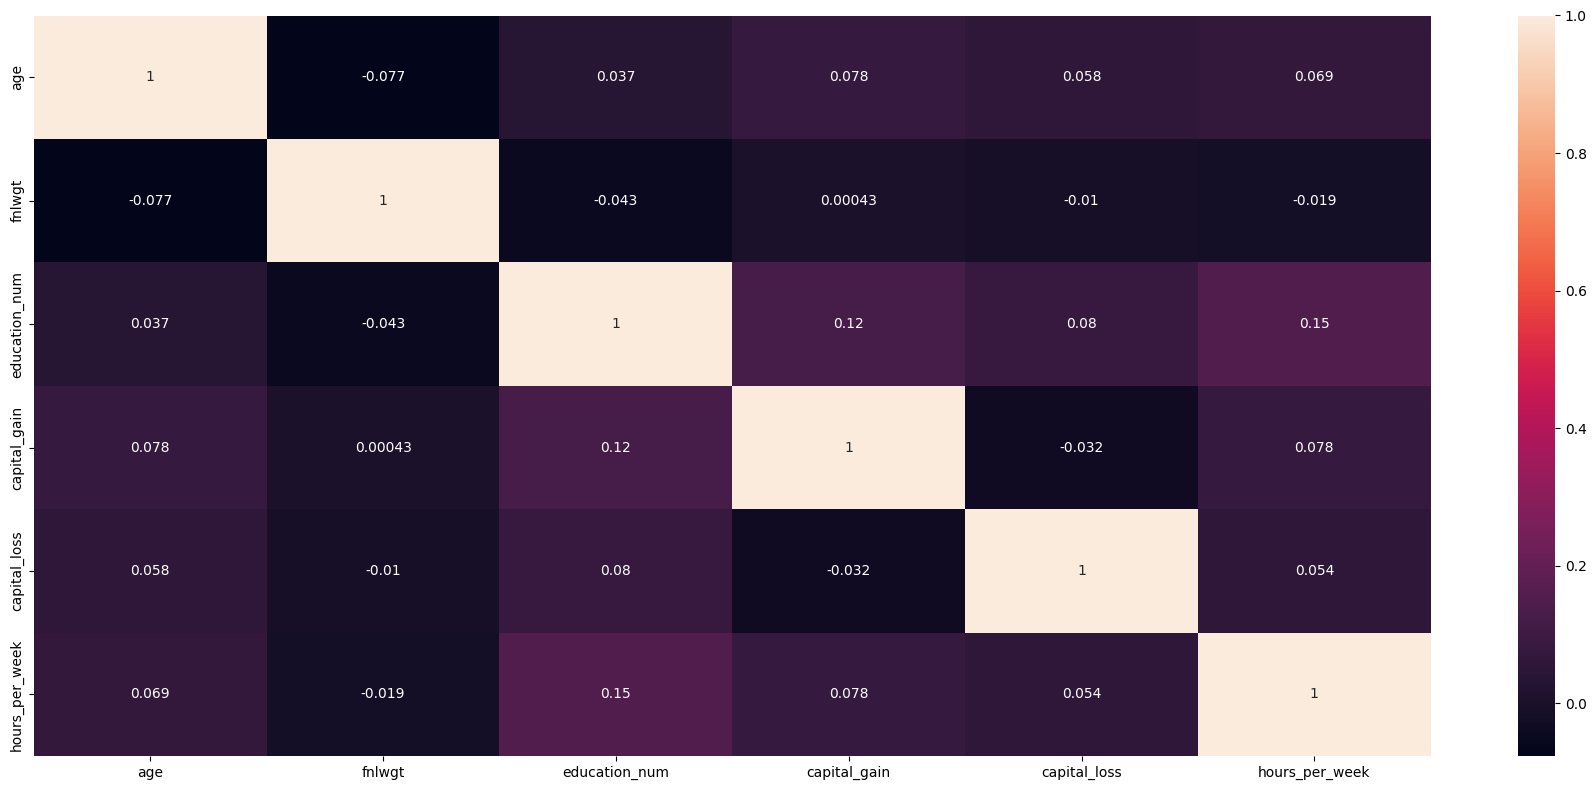

In [47]:
fig, ax=plt.subplots(1,1,figsize=(18,8))
ax = sns.heatmap(idata[numerical].corr(),annot=True)
plt.tight_layout()
plt.show()

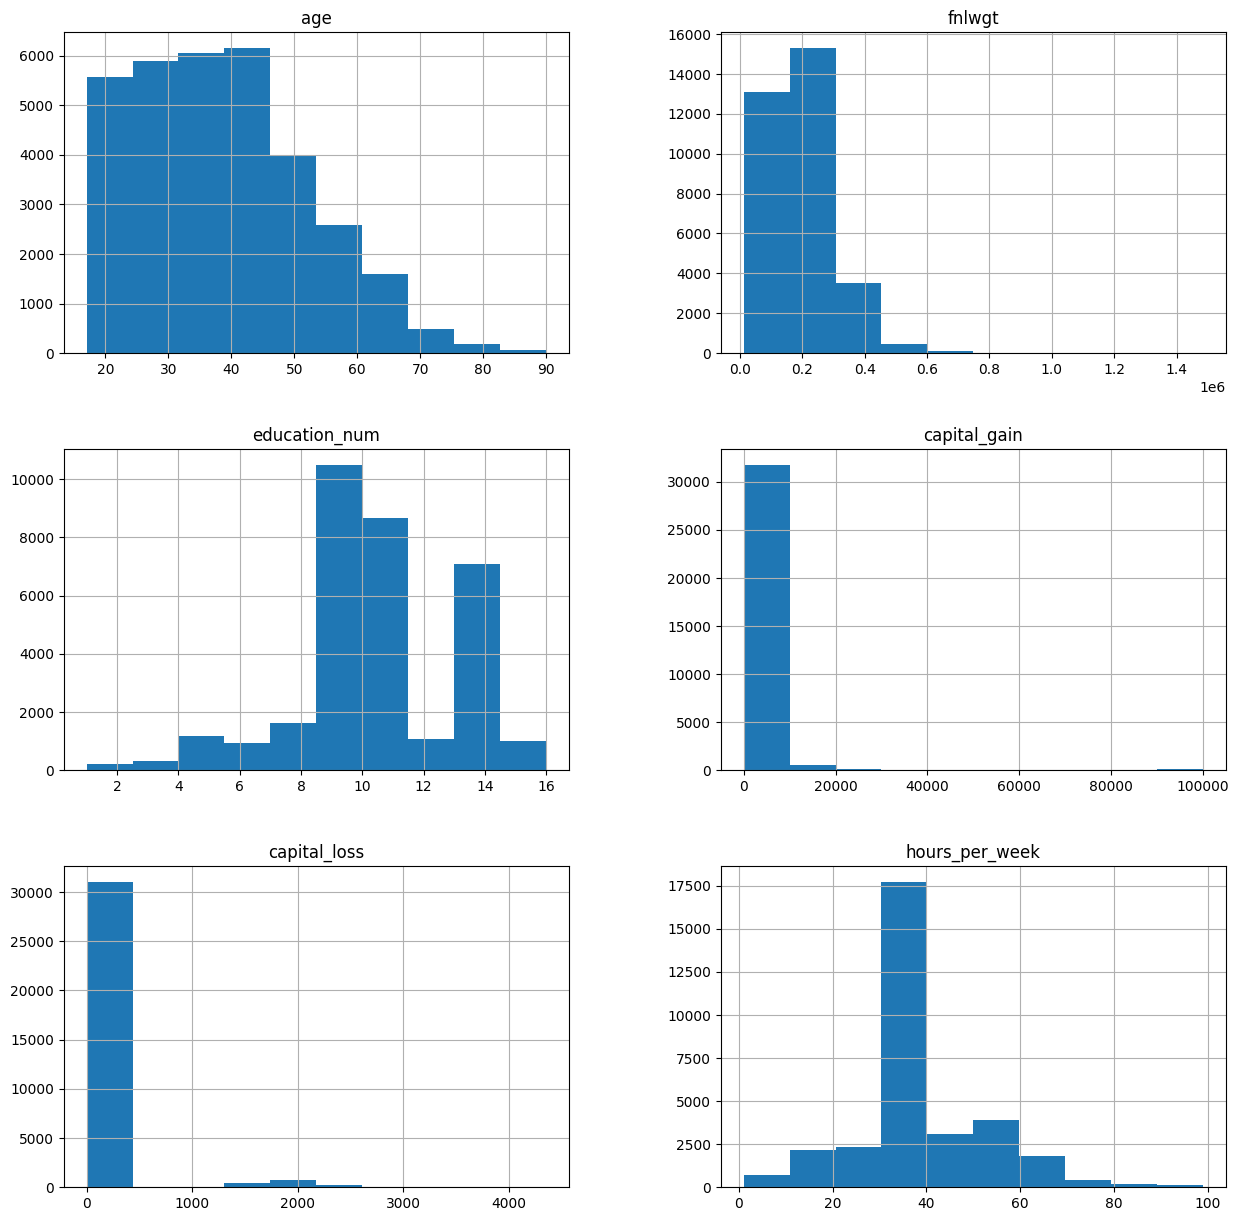

In [48]:
data_hist_plot=idata.hist(figsize=(15,15))

In [49]:
idata[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

We have to fill missing values with mode

In [50]:
idata['workclass'].fillna(idata['workclass'].mode()[0],inplace=True)
idata['occupation'].fillna(idata['occupation'].mode()[0],inplace=True)
idata['native_country'].fillna(idata['native_country'].mode()[0],inplace=True)

C:\Users\WIN 10\AppData\Local\Temp\ipykernel_11100\2678124036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  idata['workclass'].fillna(idata['workclass'].mode()[0],inplace=True)
C:\Users\WIN 10\AppData\Local\Temp\ipykernel_11100\2678124036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [51]:
idata[categorical].isnull().sum()


workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

# Data Preprocessing

Dependent and Independent variable (x,y)

In [52]:
X = idata.drop('income',axis=1)
y = idata["income"]

In [53]:
X.shape,y.shape


((32561, 14), (32561,))

train, test split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [55]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [56]:
y_train.shape, y_test.shape

((22792,), (9769,))

In [57]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [58]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

SCALING

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
from sklearn.preprocessing import RobustScaler, LabelEncoder

categorical_columns = ['workclass',      
'education',        
'marital_status',   
'occupation',        
'relationship',     
'race',     
'sex',               
'native_country'    
]
label_encoder = LabelEncoder()

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)



In [61]:
y = idata["income"]

In [62]:
y.tail()

32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, dtype: object

# MODEL TRAINING

1) LOGISTIC REGRESSION

In [63]:
from sklearn.metrics import accuracy_score,classification_report

In [64]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)

d:\incomeclassification\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
y_pred_lr = log_reg_model.predict(X_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print(f"Accuracy of Logistic Regression = {round(lr_accuracy,5)*100}%")

Accuracy of Logistic Regression = 82.199%


In [66]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report
              precision    recall  f1-score   support

       <=50K       0.83      0.96      0.89      7455
        >50K       0.74      0.38      0.51      2314

    accuracy                           0.82      9769
   macro avg       0.79      0.67      0.70      9769
weighted avg       0.81      0.82      0.80      9769



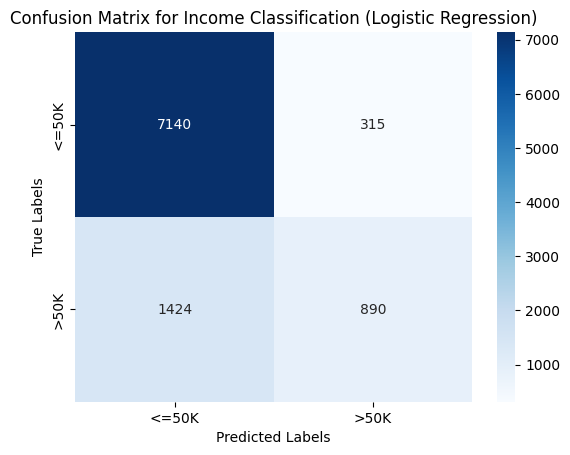

In [84]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Income Classification (Logistic Regression)')
plt.show()

2) SUPPORT VECTOR MACHINE (SVM)



In [68]:

from sklearn.svm import SVC

In [69]:
svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [70]:
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

In [71]:
print(f"Accuracy of SVM = {round(svm_accuracy,5)*100}%")

Accuracy of SVM = 80.77600000000001%


In [72]:
print("SVM Classification Report")
print(classification_report(y_test, svm_y_pred))

SVM Classification Report
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.89      7455
        >50K       0.76      0.28      0.41      2314

    accuracy                           0.81      9769
   macro avg       0.78      0.63      0.65      9769
weighted avg       0.80      0.81      0.77      9769



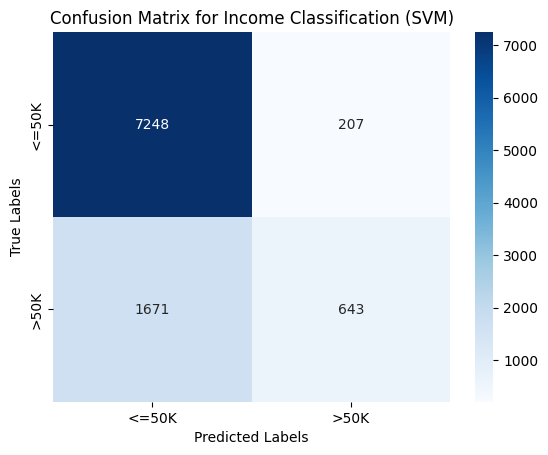

In [85]:

cm_svm = confusion_matrix(y_test, svm_y_pred)

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Income Classification (SVM)')
plt.show()

 3) K-Nearest Neighbors (KNN)

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [76]:
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

In [77]:
print(f"Accuracy of KNN = {round(knn_accuracy,5)*100}%")

Accuracy of KNN = 84.604%


In [78]:
print("KNN Classification Report")
print(classification_report(y_test, knn_y_pred))

KNN Classification Report
              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      7455
        >50K       0.69      0.63      0.66      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



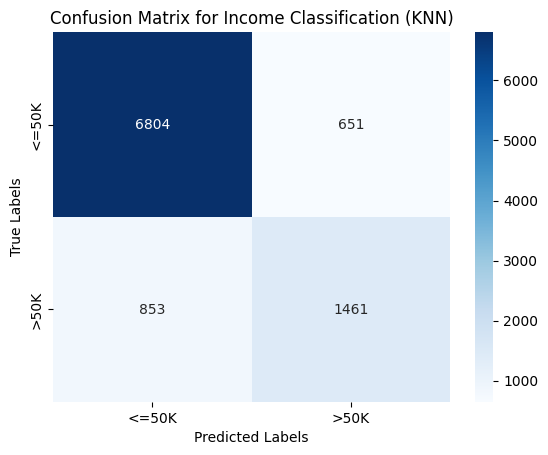

In [86]:
cm_svm = confusion_matrix(y_test, knn_y_pred)

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Income Classification (KNN)')
plt.show()

# MODEL COMPARISON

In [80]:
lr_accuracy

0.8219879209745112

In [81]:
svm_accuracy

0.8077592384072064

In [82]:
knn_accuracy

0.846043607329307

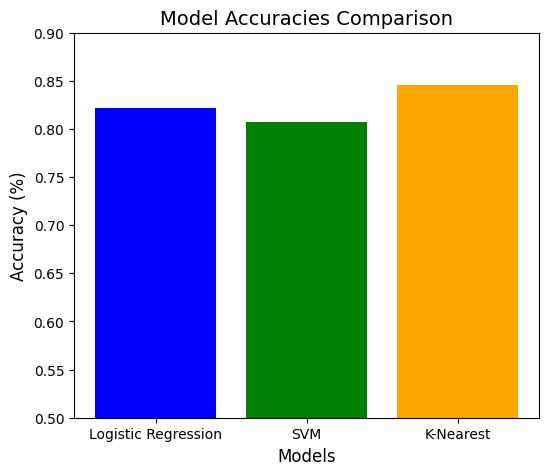

In [83]:
models = ['Logistic Regression', 'SVM', 'K-Nearest']
accuracies = [ lr_accuracy, svm_accuracy,knn_accuracy]

plt.figure(figsize=(6, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracies Comparison', fontsize=14)
plt.ylim(0.5,0.9)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.show()

From the above bar graph, it can be seen that K-Nearest Neighbors Model seem to be comparatively more accurate than the other models .